<small><i>Based on a notebook put together by Jake Vanderplas.</i></small>

# Dimensionality Reduction: Principal Component Analysis

# First do this:
\> pip install mpld3

In [4]:
%matplotlib inline

''' Initial Imports'''
# The following should enable zoom-in and rotation of 3d plots.
# pip install mpld3, if necessary.  Note: it messes up the colorbar just a bit.
# import mpld3
# mpld3.enable_notebook()

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


#********************* THE MAIN IMPORT OF THIS LECTURE********************************
from sklearn.decomposition import PCA

## Variance and Standard Deviation

## Strictly speaking, these quantities only refer to the Gaussian distribution.

## The variance:

$$
Var = \sum_{i}{(x_i - \bar{x})^2}
$$

## and the standard deviation, S:

$$
S = \sqrt{Var}
$$
 

## Breakout: Plot the histograms of two Gaussian random variable, one with a standard deviatoin of 1 and the other 5, with the average of either being 2.

xstd:


(None,
 0.99822423365799662,
 '/n',
 'ystd:',
 4.9866526430432954,
 'n/',
 'xvar:',
 0.99645162066209469,
 'n/',
 'yvar:',
 24.866704582370687)

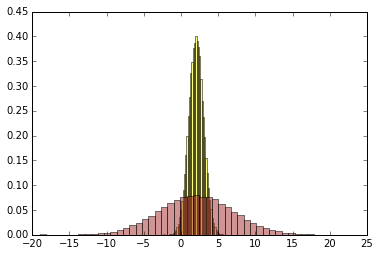

In [41]:
%matplotlib inline
'''Histogram Plot'''

import numpy as np
import matplotlib.pyplot as plt

avg = 2.
sig_x = 1.
sig_y = 5.

num_pts = 100000

x = np.random.randn(num_pts)*sig_x + avg
y = np.random.randn(num_pts)*sig_y + avg
fig = plt.figure()
ax = fig.add_subplot(111)
# the histogram of the data

Nbins = 50
# normed=1: the total area adds up to 1; # alpha: level of tranparency.
n, bins, patches = ax.hist(x, Nbins, normed=1, facecolor='yellow', alpha=.5)
n2, bins2, patches2 = ax.hist(y, Nbins, normed=1, facecolor='brown', alpha=.5)
#print ('n (normalized height, or probability density):', n, len(n))
#print 'bins (locations of bin edges):', bins, len(bins)

xvar = np.var(x)
yvar = np.var(y)

xstd = np.std(x)
ystd = np.std(y)

print ("xstd:"), xstd, '/n', 'ystd:', ystd, 'n/', 'xvar:', xvar, 'n/', 'yvar:', yvar

## If the variance around the average is too small, then sometimes one can safely replace a random variable with its average (or zero variance).

## Introducing Principal Component Analysis

Principal Component Analysis is a very powerful unsupervised method for *dimensionality reduction* in data.  It's easiest to visualize by looking at a two-dimensional dataset:

(200, 2)


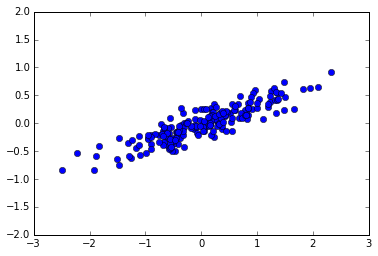

In [35]:
np.random.seed(1)
# make a 100x2 matrix where for each column, the randomness is also 
# spread out in the y-direction.
#np.random.random is uniformally random and np.random.normal is gaussian random
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T #np.dot() - performs matrix multiplication
print(X.shape) #np.dotdot() does the dot product
#print(X)
plt.plot(X[:, 0], X[:, 1], 'o')
# 'equal' forces the units of x and y to be the same, 
# so that a circle will look like a circle (instead of an ellipse).
plt.axis('equal')
plt.show()

We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution:

In [36]:
pca = PCA(n_components=2) #instantiates an instance  
pca.fit(X)
# percentage of the variance.
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
# principal axes
print(pca.components_)

[ 0.75871884  0.01838551]
[ 0.97634101  0.02365899]
[[ 0.94446029  0.32862557]
 [ 0.32862557 -0.94446029]]


To see what these numbers mean, let's view them as vectors plotted on top of the data:

length, vector 0.758718843378 [ 0.94446029  0.32862557]
length, vector 0.018385506036 [ 0.32862557 -0.94446029]


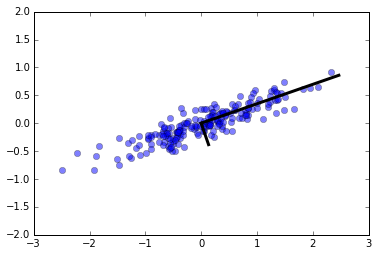

In [45]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
# below v are the principal axes; and length indicates percentage of the variance.
for length, vector in zip(pca.explained_variance_, pca.components_):
    print('length, vector', length, vector)
    # Each component of vector gives the variance in each of the two principal directions
    # Remember, sqrt(variance) = std dev, or 1-sigma; thus, 3*sqrt(length) is 3-sigma.
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], 'k-', lw=3)
plt.axis('equal')
plt.show()

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

(200, 2)
(200, 1)


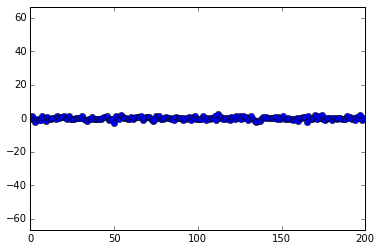

In [39]:
# keep 95% of variance
pca95 = PCA(0.95) 
# fit_transform finds the PCA components 
# and rotate the data to the principal axes
X_trans = pca95.fit_transform(X) #rotates the data to make it flat
print(X.shape)
print(X_trans.shape)

plt.plot(X_trans, 'bo')
plt.axis('equal')
plt.show()

By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

X_new.shape (200, 2)


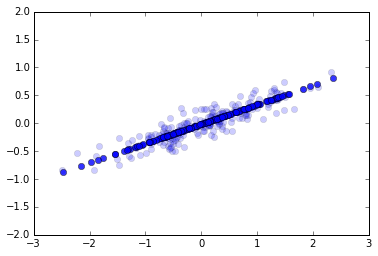

In [49]:
# inverse_transform takes you back to the original axes.
X_new = pca95.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'bo', alpha=0.8)
print('X_new.shape', X_new.shape)
plt.axis('equal')
plt.show()

The light points are the original data, while the dark points are the projected version.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!  That is, we can replace the semi-transparent data points with the solid data points, and these points contain 95% of the information.  Think in terms of the moment of inertia: for certain experiments, an object shaped like the outline of the semi-transparent data points behaves in very much the same way as an infinitely thin "needle".

This is **dimensionality reduction**: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.

## Application of PCA to Digits

The projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.  Let's take a quick look at the application of PCA to the data of handwritten digits.

## sklearn.datasets has a data set of 1797 images of the 10 digits written in different ways.

<type 'numpy.ndarray'> float64 (1797, 64)
<type 'numpy.ndarray'> int64 (1797,)
digits[:14]: [0 1 2 3 4 5 6 7 8 9 0 1 2 3]


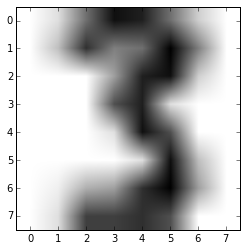

In [44]:
from sklearn.datasets import load_digits
dig_data = load_digits()
X = dig_data.data #contains 1797 images of digits 0-9
# digits: the values of the digits.
digits = dig_data.target #.target tells you what digit it is supposed to be

print(type(X), X.dtype, X.shape)
print(type(digits), digits.dtype, digits.shape)

print('digits[:14]:', digits[:14])

plt.imshow(X[13].reshape((8, 8)), cmap = 'binary')
plt.show()

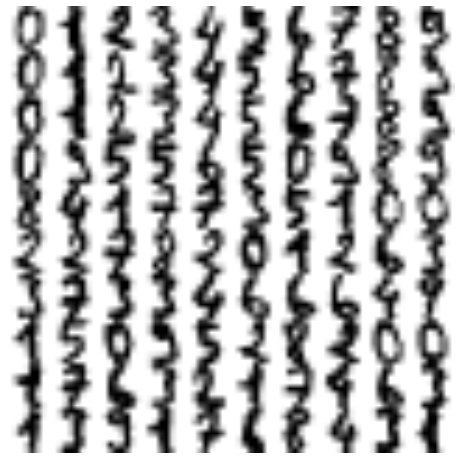

In [45]:
'''
Showing first 100 digits

Note there different ways of writing any digit, say 5.

'''

def plot_digits(X, nside = 10):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(111, frameon=False, xticks=[], yticks=[])
    
    # keeping the first nside^2 terms.
    X = X[:nside**2]
    
    X = np.reshape(X, (nside, nside, 8, 8))
    # show digits in a nside x nside square by using row_stack() and column_stack()
    im = np.row_stack([np.column_stack([X[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im, cmap = 'binary')
    plt.grid(False)
    
plot_digits(X)

## Question: How does our brain translate an image (of a digit) into a number?


### - From experience you know that you need to see a number written in many different ways in order to recognize all its different variations (a child who sees the digits for the first time will likely only recognize the printed version, and not necessarily a particular handwritten version).

### - With experirence, you know that you don't need a very high resolution of the image to recognize a digit -- as shown above, 8x8 is usually good enough.

### - Further, you know that you don't know to memorize the location of every pixel for a given digit.  What exactly is the brain's algorithm to efficiently translate an image into a number is not totally clear -- 

### _but one thing you can be sure of: It's a lot more efficient than memorizing the exact location of every digit in all its commonly occuring variations!!!!_

## Every time you brain sees a new variation of how a digit can be written, its ability of recognizing that digit increases -- in other words, you have to _train_ your brain to recognize a digit.

## ...so does computer algorithm.  It doesn't matter how clever the algorithm is, it has to be "trained".  It has to "see" the different ways a digit can be written, or,

## _Data beats algorithm_


## But it would be very inefficient if it tries to compare a new digit image with the stored position of every pixel and uses that as a way to recognize the new image. 

# _Try PCA_ 

In [53]:
# First, try projecting from 64 to 2 dimensions
pca = PCA(2)  
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


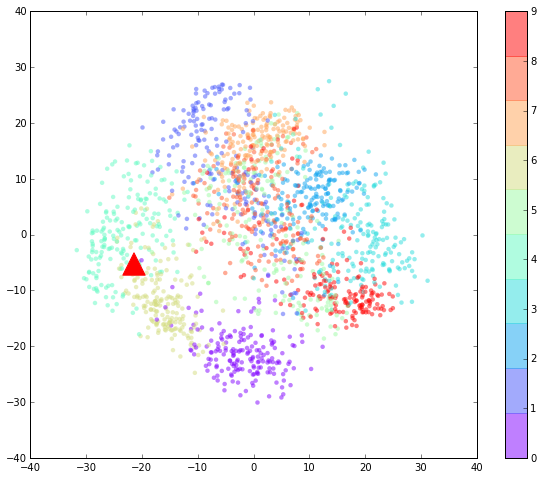

In [54]:
'''

With 2 PCA components, there is "clustering", but not clear enought separate 
all the numbers cleanly.

For example, the star below shows where one of the digital image, 6, is.

'''


plt.figure(figsize = (10, 8))
# c : color or sequence of color -- it's coded as the value of the digits.
# "nipy_spectral" is just a color scheme, you can try others, such as "rainbow"
sp2 = plt.scatter(Xproj[:, 0], Xproj[:, 1], c=digits, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10)) #alpha = transparency, 

plt.colorbar(sp2)

select_dig = 6
plt.scatter(Xproj[select_dig, 0], Xproj[select_dig, 1], color = 'red', marker = '^', \
           s = 500, alpha=1.)

plt.show()



## Breakout:

## - Do a 3 component PCA
## - Print out the percentage of variance explained by each of the 3 components
## - Do a 3d scatter plot and you can now see unambigouously the same digital image, 6, belong to the "6"-cluster.


In [ ]:
pca = PCA(3)  
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

plt.figure(figsize = (10, 8))
# c : color or sequence of color -- it's coded as the value of the digits.
# "nipy_spectral" is just a color scheme, you can try others, such as "rainbow"
sp2 = plt.scatter(Xproj[:, 0], Xproj[:, 1], Xproj[:, 2] c=digits, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10)) #alpha = transparency, 

plt.colorbar(sp2)

select_dig = 6
plt.scatter(Xproj[select_dig, 0], Xproj[select_dig, 1], color = 'red', marker = '^', \
           s = 500, alpha=1.)

plt.show()


In [56]:
'''How many components do we need to account for 50% and 95% of the variance?'''

pca50 = PCA(0.5) # keep 50% of variance
pca95 = PCA(0.95) # keep 95% of variance

X_trans50 = pca50.fit_transform(X)
X_trans95 = pca95.fit_transform(X)

print(X.shape)
print(X_trans50.shape)
print(X_trans95.shape)

# Thus as you will see, a little more than 5 components are all you need!
# A significant reduction of dimensionality!!

(1797, 64)
(1797, 5)
(1797, 29)


## Digging deeper, eigenimages.

original data shape: (1797, 64)
pca projection shape: (1797, 10)
percentage of variance exlained by the first 10 components: [ 0.14890594  0.13618771  0.11794594  0.08409979  0.05782415  0.0491691
  0.04315987  0.03661373  0.03353248  0.03078806]
Coeff's for the first 10 components:
 [ 15.90610526  -3.33246429  -9.82437176  12.27583834  -6.96516946
   1.08948291  -1.04208499 -10.97355646   3.25973527  -6.49875267]
Number of eigenimages: (10, 64)
coeffs.shape (10,)


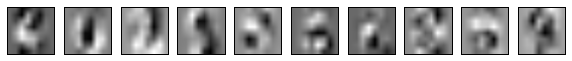

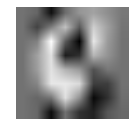

In [60]:
%matplotlib inline


n_comp = 10
dig_idx = 3


# project from 64 to n dimensions
pca = PCA(n_comp)  
Xproj = pca.fit_transform(X)
pca_comps = pca.components_
print("original data shape:", X.shape)
print("pca projection shape:", Xproj.shape)
# percentage of the variance -- NOTICE THE DECREASING ORDER OF SIGNIFICANTCE: 
# This is a feature of PCA; the eigenstates (in this case, eigneimages) are 
# ordered in terms of significance, which is measured by how much of the variance
# is explained by that one component.  
# 
# Do NOT confuse that with the magnitude of the coefficient that goes 
# in front of each component in order to reconstruct an image.
print("percentage of variance exlained by the first {:d} components:".format(n_comp), \
      pca.explained_variance_ratio_)


# These are the coefficients. {0} and {:d} are the same formatting string
print("Coeff's for the first {0} components:\n".format(n_comp), Xproj[dig_idx])


# Number of eigenimages:
print('Number of eigenimages:', pca_comps.shape)

# These are the eigenimages:
f, axes = plt.subplots(1, n_comp, figsize = (10, 2), subplot_kw=dict(xticks=[], yticks=[]))
for i in range(n_comp):
    axes[i].imshow(pca_comps[i].reshape((8, 8)), cmap='binary')

dig_im = np.zeros((8, 8))
coeffs = Xproj[dig_idx]

print('coeffs.shape', coeffs.shape)
for i in range(n_comp):
    dig_im += coeffs[i]*pca_comps[i].reshape((8, 8))

fig, ax = plt.subplots(1, 1, figsize = (2, 2))
ax.imshow(dig_im, cmap='binary')
# To turn off grid (under seaborn, the default for grid is on.)
ax.grid(False)
ax.axis('off')
plt.show()

## With Fourier decomposition, all the components (basis vectors) are orthogonal.

## With PCA decomposition, all the components (basis vectors) are _also_ orthogonal.  The components are typically referred to as eigenvectors.  

## Difference between Fouirier decomposition and PCA:

## - Fourier: the basis vectors are always the same for every problem.

## - PCA: For every problem, it figures out an _optimal_ set of basis vectors (components, or eigenvectors).  Therefore a relatively small number of such eigenvectors can be used to construct a partial image that is a good enough approximation (for the purpose of recogntion, e.g.).  
## [Very much like a partial Fourier expansion]

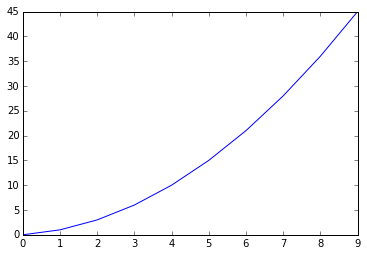

In [19]:
%matplotlib inline
'''An aside: numpy.cumsum()'''
x = np.arange(10)
y = np.cumsum(x)

plt.plot(x, y)
plt.show()


## Breakout: Choosing the Number of Components

## To get a sense of how much information we have thrown away by only keeping a certain number of components, we can plot the _total_ _explained variance_ as a function of the number components.

## Going beyond 20 components the effort will reap only rapidly diminishing returns...

# Why?

## Recognizing digit is the prototype of a problem known as classification: digits, English letters, flowers, supernovae, etc.

## The key points to solve this problem with PCA are:

## - Mutilple observation is often needed for any kind of classification.  This creates a problem because of the very high number of dimensions this kind of data usually necessitates.

## - Clearly, there is a level of redundancy present in multiple observations.

## - PCS _extracts_ from these multiple observations the most relevant information for the purpose of classification: a series of eignstates that capture successively lower amount of the variances in the data, so that one often only needs to keep a handful of eigenstates to reconstruct the observed data and accomplish classification.



## Now let's try the simplest way of classification

## To find out which digit an image represents amounts to finding out which n-dimensional cluster does the (partial) PCA representation of that image belong.

## The PCA representation of the image is given by the *n* PCA coefficients.  Therefore, one way to classify is to find the n-dimension _average_ distance between the unknown image and the members of the already classified clusters in PCA space via the Pythagorean Theorem.  

## For example, the distance between the unknown image and the *i*th member of a cluster can be calculated as follows

## _d_i^2_ = (c0 - c0_i)^2 + (c1 - c1_i)^2 + ... + (c_n - c_n_i)^2

## where c0, c1, ..., c_n are the PCA coefficients of the unknown image, and c0_i, c1_i, ..., c_n_i are the PCA cofficients of the *i*th member of a cluster.

## The unknown image belongs to the cluster with which it has the lowest average distance.  

#This accomplishes the classification.

In [22]:
'''

Note the first 10 images in the data base are simply the ten digits, 0 to 9.

Let's just use them as a trial.  Starting with zero.

'''
select_dig = 0

idx_compare = digits == 0
#idx_compare = digits == 1

Xproj_compare = Xproj[idx_compare, :]
print(Xproj_compare.shape)
metric = 0.
for i in range(Xproj_compare.shape[0]):
    metric += ( (Xproj[select_dig, :] - Xproj_compare[i, :])**2).sum()
    
metric /= (Xproj_compare.shape[0] - 1)
print(metric)

(178, 10)
270.772288553


## Breakout: Turn the above into a function, compare with all possibilities and determine which is the lowest and print out the answer.

## When actually using this on an actual unknown image that contains a digit, this can be used as a doctest.

## IPython interactive

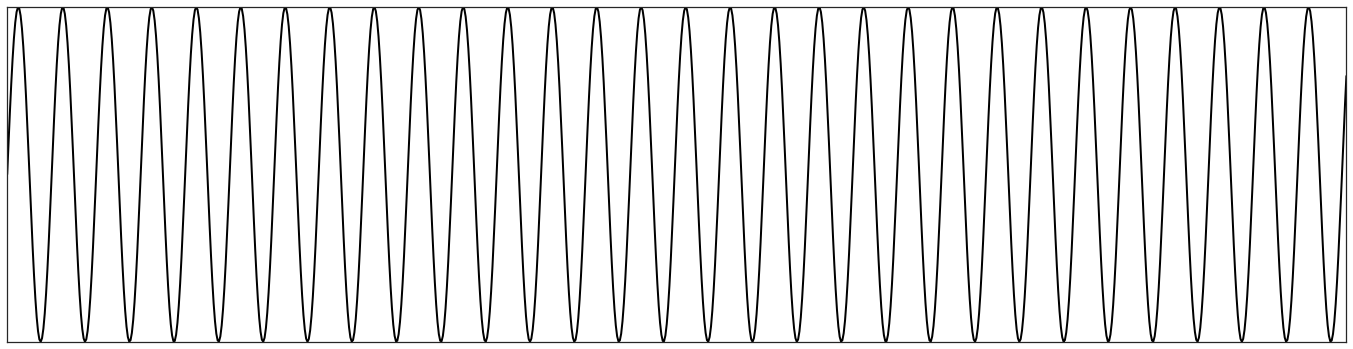

In [66]:
'''Simple slider for sine wave'''
import IPython.html.widgets as widgets
from IPython.display import display

def sine_demo(k=1.):
    x = np.linspace(0, 2*np.pi,1000)
    s = np.sin(k*x) 
    fig = plt.figure(figsize=(24,6))
    ax = fig.add_subplot(111)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.plot(x,s,lw=2,color='black')
    plt.xlim(x.min(), x.max())

k_slider = widgets.FloatSlider(min=0.5, max=100, step=0.1, value=1.)
w=widgets.interactive(sine_demo, k=k_slider)
display(w)

## Plot the well-know sigmoid function with two slider for the parameters a and b:

    s = 1/(1+np.exp(-(x-a)/(b+0.1))) # +0.1 to avoid dividing by 0
    
## Plot it and then normalize it to between 0 and 100.  About the parameters a and b,

a: should be between -5 and 5, with a default value of 0 and 

b: should be between -5 and 5, with a default value of 0. 

# End of Week 14, Lecture 1 (No Lecture 2 due to Thanksgiving)